# PCA- parte 2
### Pamela E. Pairo- AID 2022

Importamos las librerias necesarias

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def biplot(score,coeff,labels=None, classes=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    y = classes
    ax=plt.scatter(xs * scalex,ys * scaley, c = y)
    plt.legend(*ax.legend_elements(), prop={'size': 16})
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, "Var"+str(i+1), color = 'r', ha = 'center', va = 'center', fontsize= 14)
        else:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, labels[i], color = 'r', ha = 'center', va = 'center', fontsize= 14)

    plt.ylim(-0.6, 0.6)
    plt.xlim(-0.6, 0.6)
    plt.grid()

Cargamos la base de datos

In [2]:
df= pd.read_excel("vino.xlsx")
df.head(3)

,acidez fija,acidez volátil,ácido cítrico,azúcar residual,cloruros,anhídrido sulfuroso libre,anhídrido sulfuroso total,densidad,pH,sulfatos,alcohol,calidad,variedad
0,7.2,0.23,0.39,14.2,0.058,49.0,192.0,0.9979,2.98,0.48,9.0,7,1
1,7.2,0.20,0.36,2.5,0.028,22.0,157.0,0.9938,3.48,0.49,10.6,6,1
2,7.3,0.40,0.24,6.7,0.058,41.0,166.0,0.9950,3.20,0.41,9.9,6,1


In [3]:
df_numericas= df.iloc[:, :12]# solo variables numericas
df_numericas.head(4)

,acidez fija,acidez volátil,ácido cítrico,azúcar residual,cloruros,anhídrido sulfuroso libre,anhídrido sulfuroso total,densidad,pH,sulfatos,alcohol,calidad
0,7.2,0.23,0.39,14.20,0.058,49.0,192.0,0.99790,2.98,0.48,9.000000,7
1,7.2,0.20,0.36,2.50,0.028,22.0,157.0,0.99380,3.48,0.49,10.600000,6
2,7.3,0.40,0.24,6.70,0.058,41.0,166.0,0.99500,3.20,0.41,9.900000,6
3,6.5,0.29,0.30,9.15,0.051,25.0,166.0,0.99339,3.24,0.56,11.333333,6


## PCA

In [4]:
feature_matrix_standarized = preprocessing.StandardScaler().fit_transform(df_numericas)# estandarizamos los datos

In [5]:
_, nof_components = feature_matrix_standarized.shape
pca = PCA(n_components=nof_components)
principal_components = pca.fit_transform(feature_matrix_standarized)

## Autovalores

¿Qué proporción de la variabilidad total es explicada por cada una de las componentes?

In [6]:
explained_variance = pca.explained_variance_ratio_ #proporción de varianza explicada por cada componente
explained_variance

array([0.29368447, 0.19362268, 0.15590002, 0.0818719 , 0.06956985,
       0.0582499 , 0.04114639, 0.03754704, 0.03260856, 0.02161443,
       0.01089152, 0.00329325])

In [7]:
percent_var= np.round(explained_variance*100, 2)
percent_var# porcentaje de varianza explicada por cada componente

array([29.37, 19.36, 15.59,  8.19,  6.96,  5.82,  4.11,  3.75,  3.26,
        2.16,  1.09,  0.33])

In [8]:
acc_variance_percent = np.cumsum(percent_var)
acc_variance_percent #porcentaje de varianza acumulada explicada por cada componente

array([29.37, 48.73, 64.32, 72.51, 79.47, 85.29, 89.4 , 93.15, 96.41,
       98.57, 99.66, 99.99])

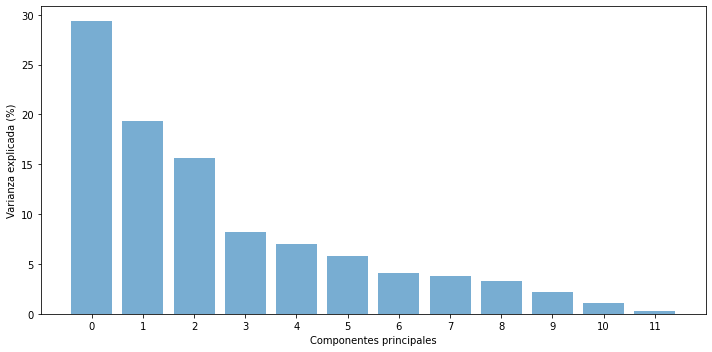

In [9]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(percent_var)),
        percent_var,
        alpha=0.6)
  
plt.ylabel('Varianza explicada (%)')
plt.xlabel('Componentes principales')
plt.xticks(range(nof_components))
plt.tight_layout()

plt.show()

## Cargas o _loadings_

In [10]:
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']
loadings = pd.DataFrame(pca.components_.T,
                        columns=columns, 
                        index=df_numericas.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
acidez fija,0.365815,0.224392,0.325171,0.185462,0.052468,-0.233950,-0.072259,0.034364,-0.500916,-0.234201,0.357009,-0.422594
acidez volátil,0.359957,-0.124016,-0.330507,-0.013725,0.023272,-0.486204,0.191586,-0.059615,-0.204122,0.599047,-0.248085,-0.079768
ácido cítrico,0.018411,0.324565,0.486014,0.123391,0.243179,0.426043,0.230830,-0.283382,-0.124297,0.387471,-0.320887,0.009732
azúcar residual,-0.177863,0.454063,-0.140148,-0.299953,-0.420582,-0.038712,0.485813,0.003671,0.132872,-0.108176,-0.098076,-0.446303
cloruros,0.408218,0.142215,-0.055973,-0.107700,0.184995,-0.114656,-0.097166,-0.643724,0.532600,-0.147535,0.141955,-0.040360
anhídrido sulfuroso libre,-0.296048,0.260378,-0.203159,-0.241024,0.562056,-0.252071,-0.162864,-0.076293,-0.266590,-0.322202,-0.398036,0.009160
anhídrido sulfuroso total,-0.390020,0.323937,-0.157870,-0.029869,0.270885,-0.081969,0.009628,-0.000296,0.025690,0.428896,0.668500,0.073751
densidad,0.349467,0.415030,-0.129971,-0.190246,-0.225471,0.064727,0.099070,0.053334,-0.258344,-0.128052,0.075869,0.704241
pH,0.138922,-0.318402,-0.334188,-0.428563,0.129670,0.556470,0.079076,-0.191390,-0.357421,-0.010871,0.196636,-0.219279
sulfatos,0.340050,0.040273,0.196246,-0.403000,0.390359,0.042936,0.089933,0.632334,0.332217,0.063664,0.007619,-0.072010


## Scree plot

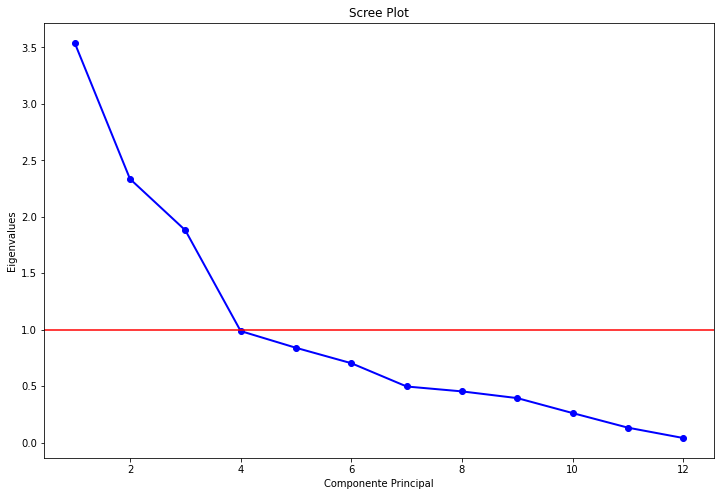

In [11]:
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(12,8))
plt.plot(PC_values, pca.explained_variance_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.axhline(y=1, color='r', linestyle='-')
plt.xlabel('Componente Principal')
plt.ylabel('Eigenvalues')
plt.show()

## Scores

In [12]:
scores= pd.DataFrame(principal_components[:, :12],
                     columns=columns)
scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-2.075054,3.281927,0.160979,-0.893745,-0.761368,-0.567674,-0.899389,-0.009369,0.260079,0.397347,-0.160616,0.111986
1,-1.421999,-0.636532,0.049853,-0.293775,0.341276,1.503473,-0.258293,-0.000402,-0.768300,0.415379,1.052354,-0.110433
2,-1.400173,0.770102,-0.904696,-0.019512,0.000927,-0.606656,-0.602699,-0.324694,-0.284924,0.330989,0.323947,-0.092997
3,-1.707270,0.071332,0.085138,-0.601143,0.018366,-0.016843,0.696357,0.117184,0.559934,0.377855,0.691768,-0.241771
4,-3.185034,-0.446370,1.718700,-1.174607,-1.247446,-1.529308,-0.227887,-0.715186,-0.347023,-0.160339,-0.018979,-0.002802
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.857863,-2.036327,-1.951063,-2.355221,1.189672,-0.702691,-0.044469,-0.134500,-0.210883,-0.630591,-0.053341,-0.002602
196,2.641788,0.399135,0.960543,0.101243,-0.144295,-2.041336,0.104963,0.705595,-0.647763,0.012690,0.401994,0.214950
197,1.989293,1.484160,0.801209,0.147253,1.539501,1.118789,0.034350,0.573443,-0.041972,-0.166774,0.073298,-0.044746
198,1.650198,-0.137349,-1.063993,0.673590,0.230918,0.187049,0.103235,0.073958,0.454288,1.477591,-0.195024,0.100308


## Biplot

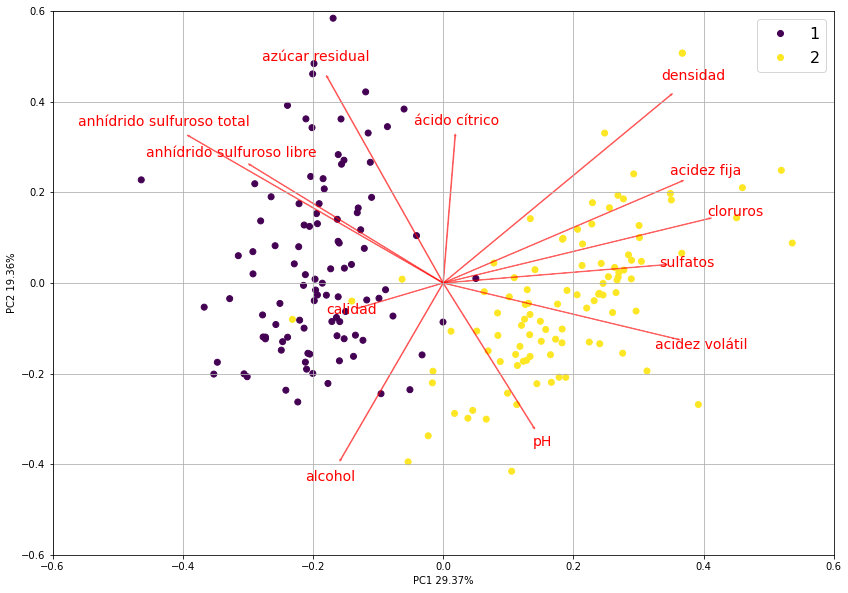

In [13]:
plt.figure(figsize=(14, 10))
biplot(principal_components[:,0:2],np.transpose(pca.components_[0:2, :]),list(df_numericas.columns), df.variedad)
plt.xlabel(f"PC1 {percent_var[0]}%")
plt.ylabel(f"PC2 {percent_var[1]}%")
plt.show()